## Generate an AWS costs chart

AWS costs are downloaded via the AWS costs explorer API. The adapter creates a simpler
'costs' view which we use to build our chart.

The main logic is grouping by service but bucketing small-value services into an "other" category.

In [6]:
$AWS=SELECT  case
    WHEN service like '%Redshift%' then 'Redshift'
    WHEN service like '%Compute Cloud%' then 'EC2'
    WHEN service like '%SageMaker%' then service
    WHEN service like '%Relational Database Service%' then 'RDS'
    WHEN service like '%Simple Storage Service%' then 'S3'
    WHEN service = 'AmazonCloudWatch' then 'CloudWatch'
    WHEN service like '%CloudFront%' then 'CloudFront'
    WHEN service like '%EC2 - Other%' then 'EC2'
    WHEN service like '%Databricks%' then 'DBX'
    ELSE 'other'
  end as svc_name,
  sum(blended) as total,  
  cast("day" as varchar) as end_date
FROM
  awscosts.costs
WHERE
  "day"  >= (now() - interval 30 day) 
     and 
   purchase not like '%Reserved%'
     and
   service not like '%AWS Support%' and service not like '%Databricks%'
GROUP BY
  svc_name, "day"
ORDER BY
  "day", total desc


214 rows

svc_name,total,end_date
EC2,1938.31,2022-09-11
RDS,1599.18,2022-09-11
other,808.36,2022-09-11
S3,626.46,2022-09-11
CloudWatch,442.30,2022-09-11
Redshift,353.58,2022-09-11
CloudFront,280.30,2022-09-11
Amazon SageMaker,63.58,2022-09-11
EC2,2079.12,2022-09-12
RDS,1654.23,2022-09-12


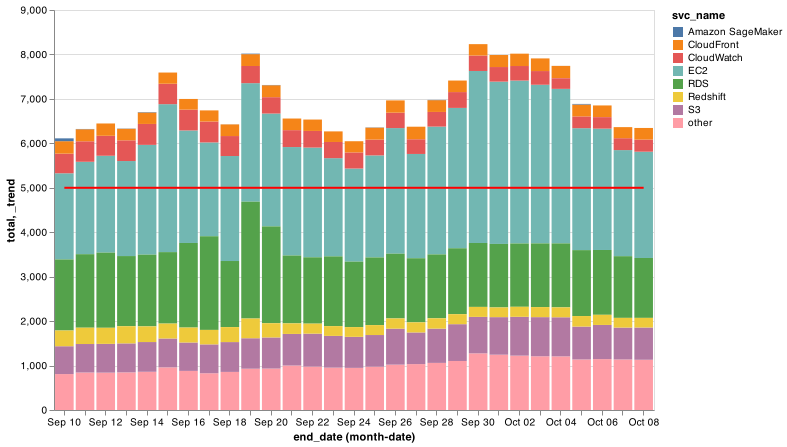

In [7]:
create chart as bar_chart 
  where x = 'monthdate(end_date):O' and 
  y = total 
  and color = svc_name 
  and trendline=5000

In [8]:
email chart to 'scottp@berkeleyzone.net' subject 'AWS Costs report'

Emailing last chart to ['scottp@berkeleyzone.net']

In [ ]:
run every day starting at 11:59